# Classificazione Binaria: `selfMade` con Decision Tree
Obiettivo del notebook: addestrare un albero decisionale con criterio d'impurità gini per prevedere se un miliardario è selfMade(True) o non selfMade(False)


Vengono importati i moduli necessari, tra cui :
- modelli e metriche da sklearn
- funzione ausiliaria per valutare e salvare il modello
- joblib per salvare il modello addestrato

i dati sono divisi in training e test set. Si utilizza ravel() per trasformare le etichette in array monodimensionali

In [1]:
import pandas as pd
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model
from utility import plot_roc_curve


X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()



si istanzia l'albero decisionale con criterio d'impurutà gini e viene addestrato sui dati splittati (train set).
Inoltre non viene specificato nessun limite di profondità e nessuna potatura

In [2]:
from sklearn.tree import DecisionTreeClassifier

# la libreria sklearn.tree se non viene specificato un altro criterio
# utilizza gini di default

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

Si fanno le predizioni sia su train che su test e si richiama la funzione personalizzata che:
- calcola le metriche
- salva i risultati
- salva il modello (joblib)
- calcola la matrice di confusione

la funzione evaluate_and_save_model(...) si può trovare al seguente percorso ../Scripts/utility

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


evaluate_and_save_model(
	model,
	"decision tree default gini",
	y_train,
	y_pred_train,
	y_test,
	y_pred_test,
	"../results/classification_selfMade/decision_tree/gini",
	"../models/dt_gini.joblib"
)





Visualizza i primi 3 livelli dell'albero decisionale evidenziando
- feature usate
- soglie di split
- classi predette

In [4]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, max_depth=3, feature_names=X_train.columns, class_names=["False", "True"])
plt.savefig("../results/classification_selfMade/decision_tree/gini/preview_gini.png")
plt.close()

#  ROC per valutare la qualità del modello
Nel caso della curva roc per classificazione binaria si considera solo la probabilità della classe positiva in questo caso selfMade=true=1
- viene calcolata y_proba tramite model.predict.proba() che calcola la probabilità che il modello assegna all'istanza di appartenere alla classe 1
- roc_curve() calcola:
    - fpr: false positive rate
    - tpr: trupe positive rate
    - le soglie di decisione
- auc(fpr,tpr) calcola l'AUC ovvero l'area sotto la curva ROC
AUC va da 0 a 1:
    - 1.0=classificazione perfetta
    - 0.5 classificazione casuale
    - < 0.5 peggio del classificatore random quindi il modello non ha una buona capacità a classificare
    

A tal fine ci serviamo di una funzione ausiliaria presente in ../Scripts/roc.py che mi permette di calcolare la curva roc

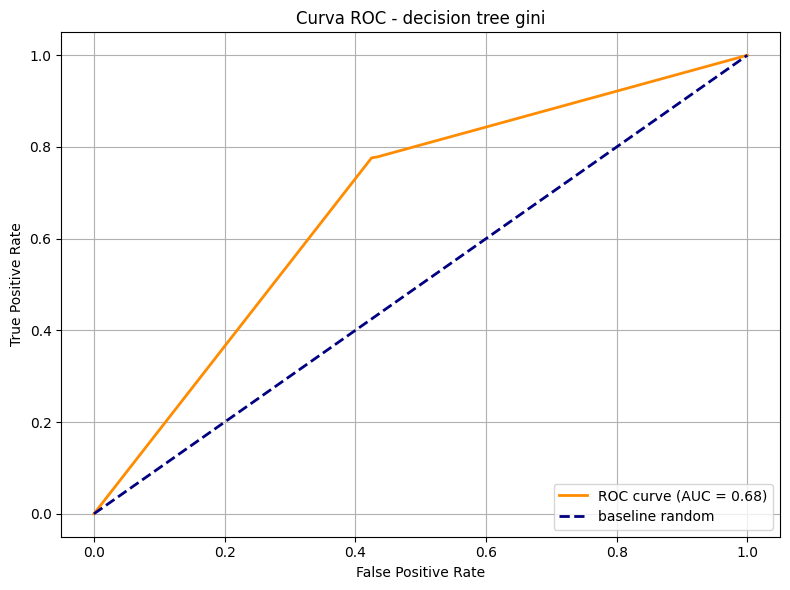

np.float64(0.6752695625385089)

In [ ]:
plot_roc_curve(model, X_test, y_test, "decision tree gini",f"../results/classification_selfMade/roc")

In questo caso abbiamo un AUC=0.68 il che significa che il modello è migliore rispetto al modello random, ma può essere migliorato